# This notebook presents several ideas of a technical approach to conducting stock price analysis.

## Imports and setup

In [149]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

In [151]:
start = datetime(2019, 1, 1)
end = datetime.today()

Let's select a few NYSE tickers in the form of a dictionary, which will be loaded into yfinance.

In [152]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [153]:
df = yf.download(tickers, start, end, group_by='ticker')

[*********************100%%**********************]  6 of 6 completed


In [154]:
df.tail()

Ticker              GS                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-05-02  431.200012  433.649994  428.170013  432.570007  432.570007   
2024-05-03  435.000000  442.299988  434.920013  438.179993  438.179993   
2024-05-06  441.750000  444.380005  439.679993  443.670013  443.670013   
2024-05-07  445.170013  447.420013  442.869995  443.799988  443.799988   
2024-05-08  442.799988  448.019989  442.049988  446.950012  446.950012   

Ticker                      MS                                   ...  \
Price        Volume       Open       High        Low      Close  ...   
Date                                                             ...   
2024-05-02  2087500  92.540001  92.919998  91.599998  92.650002  ...   
2024-05-03  2406300  93.339996  94.419998  93.279999  93.639999  ...   
2024-05-06  1914300  94.559998  94.910004  93.699997  94.790001  ...   
2024-05-07  2058200  94.919998  95.930000  94.709999  95.790001  ...   
2024-05-08  1990320  95.430000  96.050003  95.099998  95.639999  ...   

Ticker            WFC                                        BAC             \
Price             Low      Close  Adj Close    Volume       Open       High   
Date                                                                          
2024-05-02  59.320000  59.830002  59.830002  15329500  37.369999  37.490002   
2024-05-03  59.119999  59.939999  59.939999  17298500  37.250000  37.529999   
2024-05-06  59.840000  60.189999  60.189999  16240100  37.660000  37.790001   
2024-05-07  60.060001  60.259998  60.259998  16268200  37.700001  38.150002   
2024-05-08  60.095001  61.230000  61.230000  18626875  37.700001  37.820000   

Ticker                                                 
Price             Low      Close  Adj Close    Volume  
Date                                                   
2024-05-02  36.650002  36.880001  36.880001  34860300  
2024-05-03  37.080002  37.250000  37.250000  34082700  
2024-05-06  37.360001  37.689999  37.689999  28422300  
2024-05-07  37.700001  37.840000  37.840000  29119500  
2024-05-08  37.514999  37.709999  37.709999  24390167  

[5 rows x 36 columns]

In [155]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1347 entries, 2019-01-02 to 2024-05-08
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (GS, Open)        1347 non-null   float64
 1   (GS, High)        1347 non-null   float64
 2   (GS, Low)         1347 non-null   float64
 3   (GS, Close)       1347 non-null   float64
 4   (GS, Adj Close)   1347 non-null   float64
 5   (GS, Volume)      1347 non-null   int64  
 6   (MS, Open)        1347 non-null   float64
 7   (MS, High)        1347 non-null   float64
 8   (MS, Low)         1347 non-null   float64
 9   (MS, Close)       1347 non-null   float64
 10  (MS, Adj Close)   1347 non-null   float64
 11  (MS, Volume)      1347 non-null   int64  
 12  (C, Open)         1347 non-null   float64
 13  (C, High)         1347 non-null   float64
 14  (C, Low)          1347 non-null   float64
 15  (C, Close)        1347 non-null   float64
 16  (C, Adj Close)    1347 n

# Explanatory data analysis

Let's remove unwanted columns and check the maximum historical price of the selected stocks.

In [156]:
df.xs(key='Close', axis='columns', level='Price').max()

Ticker
GS     446.950012
MS     108.730003
C       81.910004
JPM    200.300003
WFC     61.230000
BAC     49.380001
dtype: float64

In [157]:
dfClose = df.xs(key='Close', axis='columns', level='Price')
dfClose.tail()

Ticker,GS,MS,C,JPM,WFC,BAC
Date,,,,,,
2024-05-02,432.570007,92.650002,61.540001,191.660004,59.830002,36.880001
2024-05-03,438.179993,93.639999,61.520000,190.509995,59.939999,37.250000
2024-05-06,443.670013,94.790001,62.810001,192.000000,60.189999,37.689999
2024-05-07,443.799988,95.790001,62.000000,191.750000,60.259998,37.840000
2024-05-08,446.950012,95.639999,62.750000,195.649994,61.230000,37.709999


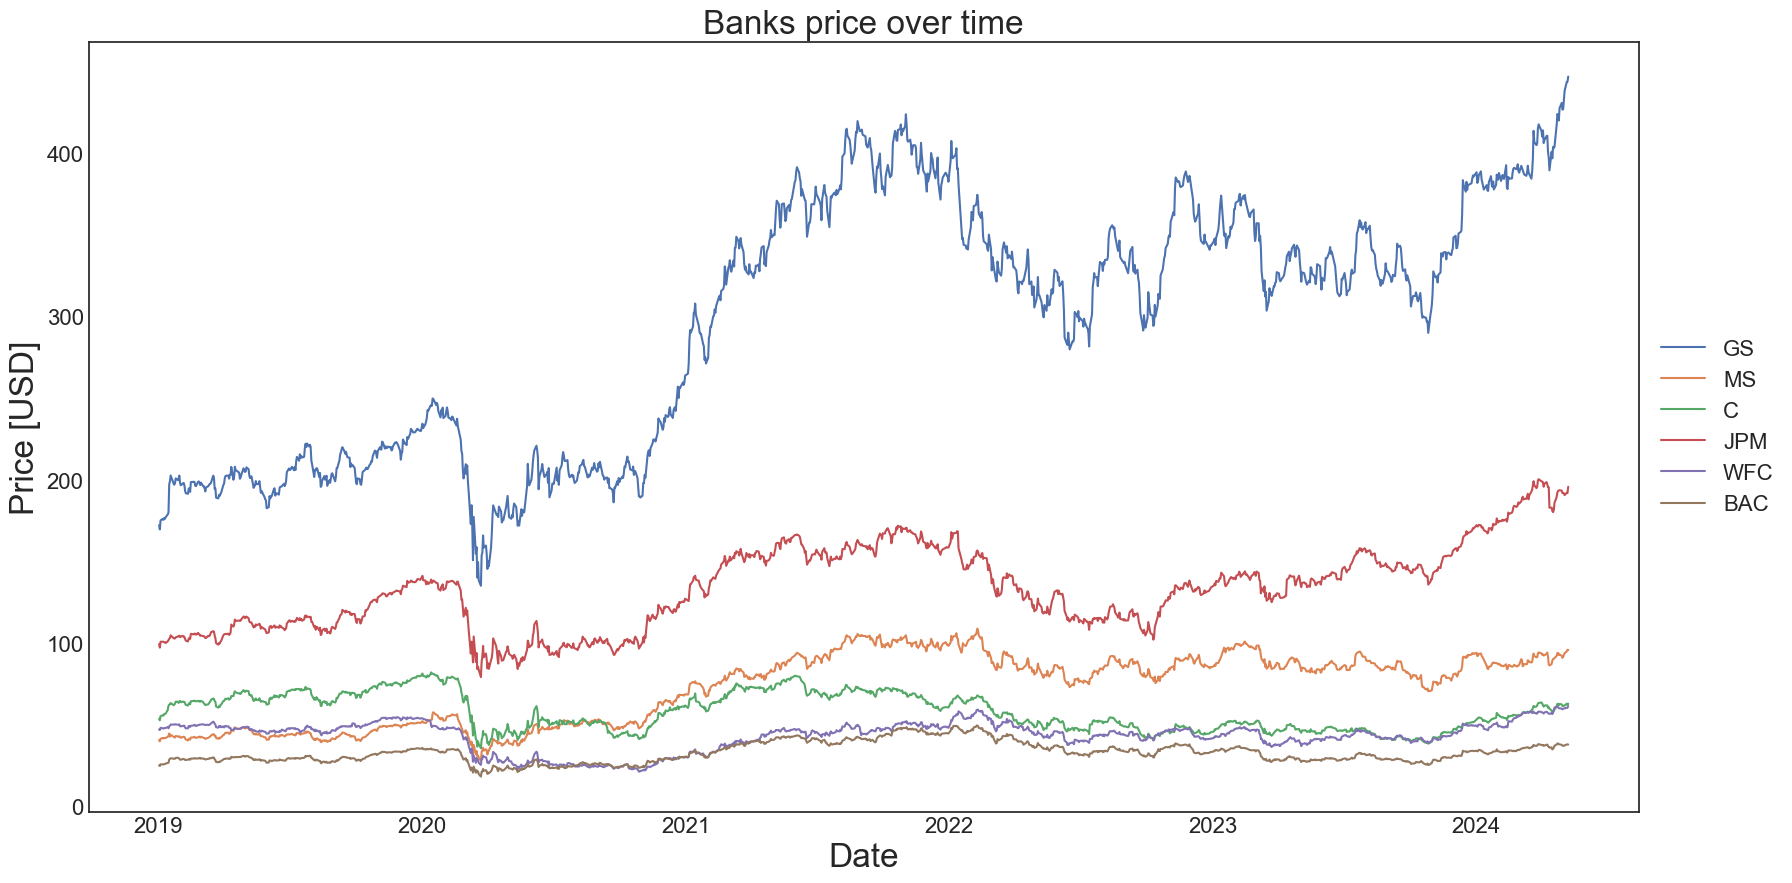

In [158]:
fig, axes = plt.subplots(figsize=(20,10))

axes.plot(dfClose)
axes.set_xlabel('Date', fontsize=24)
axes.set_ylabel('Price [USD]', fontsize=24)
axes.set_title('Banks price over time', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(labels=dfClose.columns, loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=16)

plt.show()

In [159]:
dfReturns = df.xs(key='Close', axis='columns', level='Price').pct_change()

dfReturnsColNames = {
    'GS': 'GS Return',
    'WFC': 'WFC Return',
    'MS': 'MS Return',
    'C': 'C Return',
    'BAC': 'BAC Return',
    'JPM': 'JPM Return'
}

dfReturns.rename(columns=dfReturnsColNames, inplace=True)

In [160]:
dfReturns.fillna(0, inplace=True)
dfReturns.iloc[:2]

Ticker,GS Return,MS Return,C Return,JPM Return,WFC Return,BAC Return
Date,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.014649,-0.017822,-0.018121,-0.022153,-0.007882,-0.016026


In [161]:
dfReturns.iloc[-2:]

Ticker,GS Return,MS Return,C Return,JPM Return,WFC Return,BAC Return
Date,,,,,,
2024-05-07,0.000293,0.010550,-0.012896,-0.001302,0.001163,0.003980
2024-05-08,0.007098,-0.001566,0.012097,0.020339,0.016097,-0.003436


<Axes: ylabel='Frequency'>

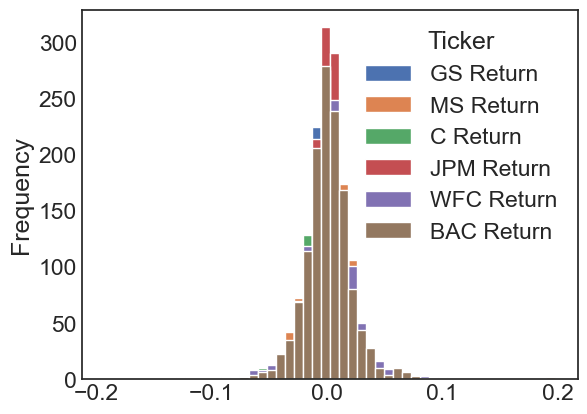

In [162]:
dfReturns.plot.hist(bins=50)

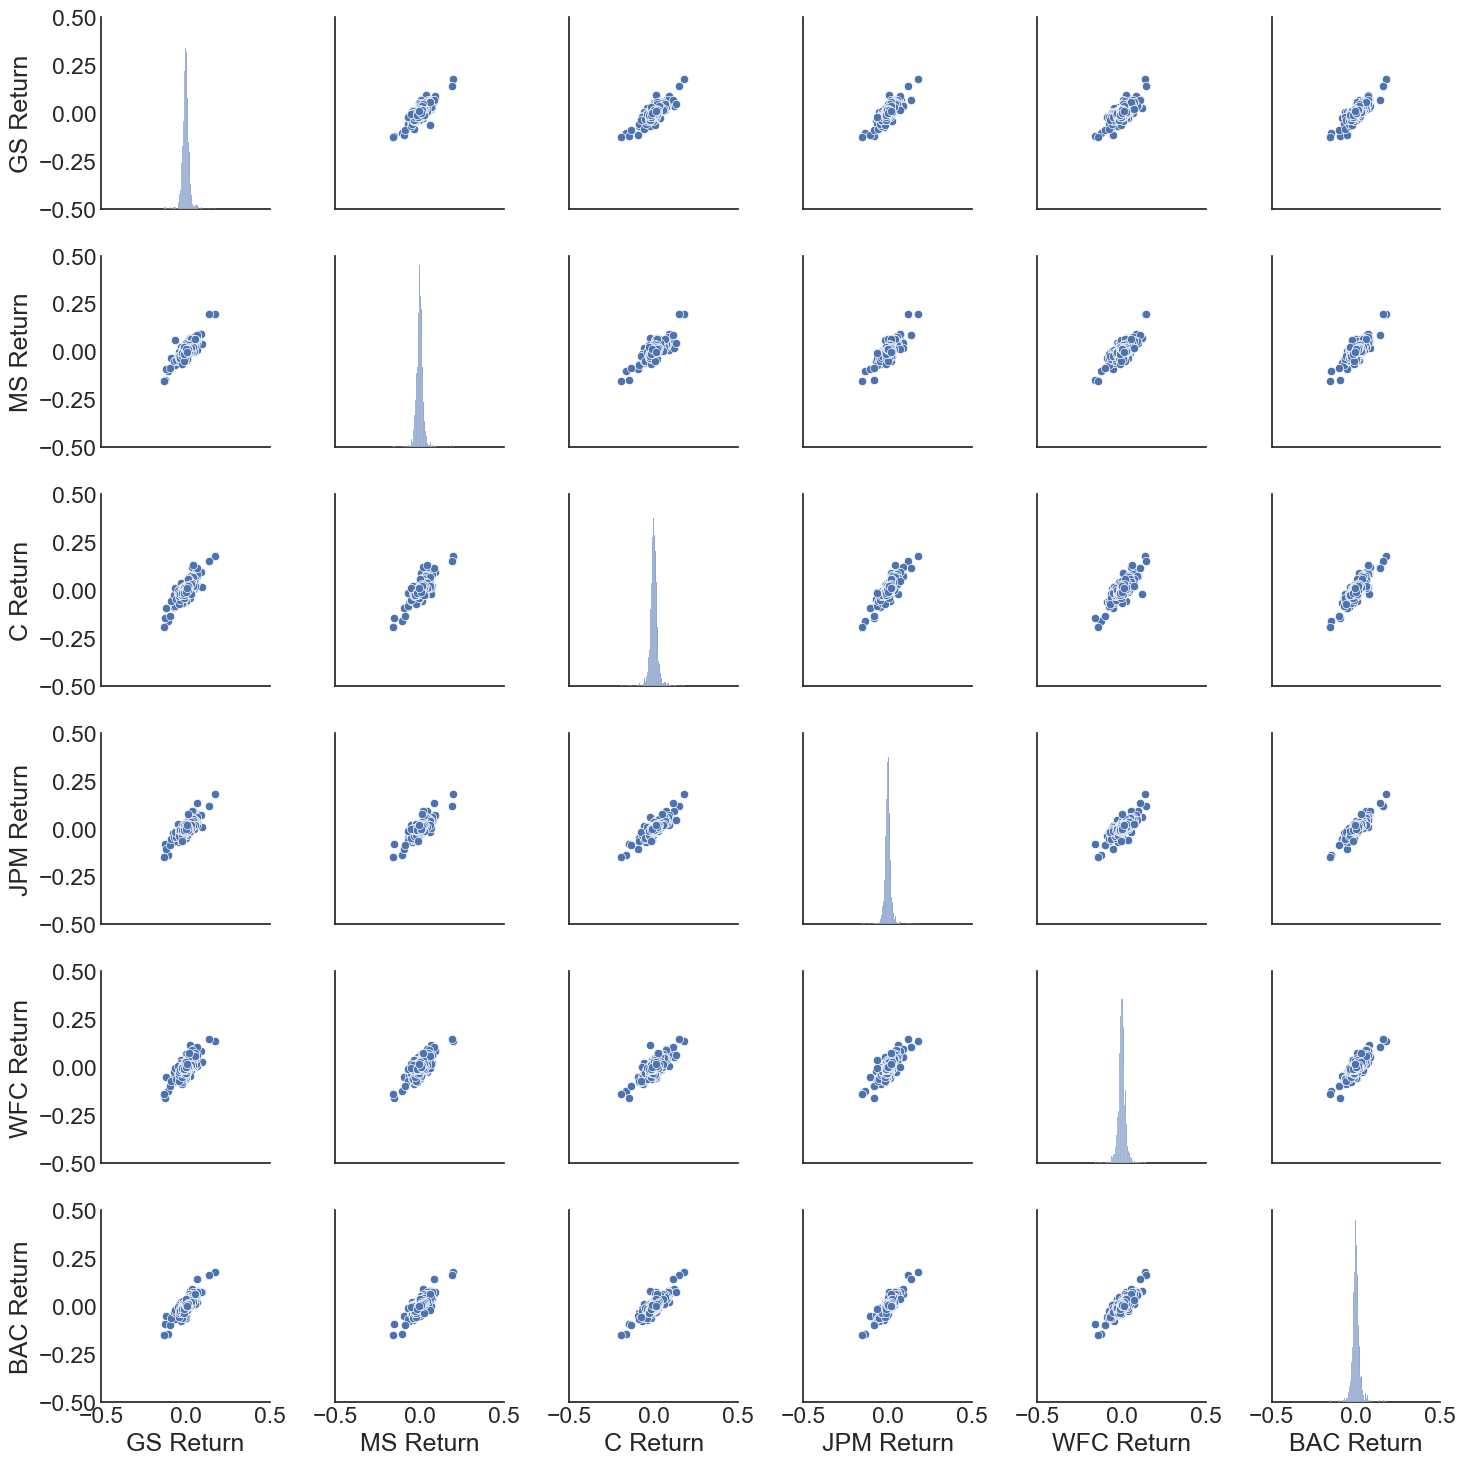

In [163]:
pairPlot = sns.pairplot(dfReturns[1:])
pairPlot.set(xlim=(-0.5,0.5))
pairPlot.set(ylim=(-0.5,0.5))
plt.tight_layout()

Let's check, when was the biggest dropdown.

In [164]:
dfReturns.idxmin()

Ticker
GS Return    2020-03-16
MS Return    2020-03-16
C Return     2020-03-16
JPM Return   2020-03-16
WFC Return   2020-03-12
BAC Return   2020-03-16
dtype: datetime64[ns]

If we were to consider adding these stocks to our portfolio, then according to the Modern Portfolio Theory by Markowitz, it would be necessary to adjust the amount of stocks in the portfolio due to volatility – in this case, the appropriate measure is the standard deviation. To make a long story short, we should proportionally add fewer of the stocks with the highest standard deviation to the portfolio than those with lower volatility.

In [165]:
dfClose.std()

Ticker
GS     76.606728
MS     21.464159
C      11.295312
JPM    25.334065
WFC     8.826020
BAC     6.347321
dtype: float64

Regardless of local price volatility, the daily dispersion of returns is similar for all positions.

In [166]:
dfReturns.std()

Ticker
GS Return     0.020219
MS Return     0.021799
C Return      0.023992
JPM Return    0.019666
WFC Return    0.023390
BAC Return    0.022055
dtype: float64

<Axes: xlabel='GS Return', ylabel='Count'>

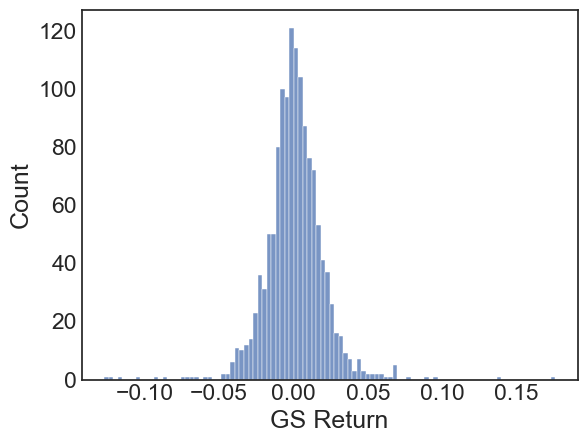

In [167]:
sns.histplot(dfReturns['GS Return'], bins=100)

<Axes: xlabel='C Return', ylabel='Count'>

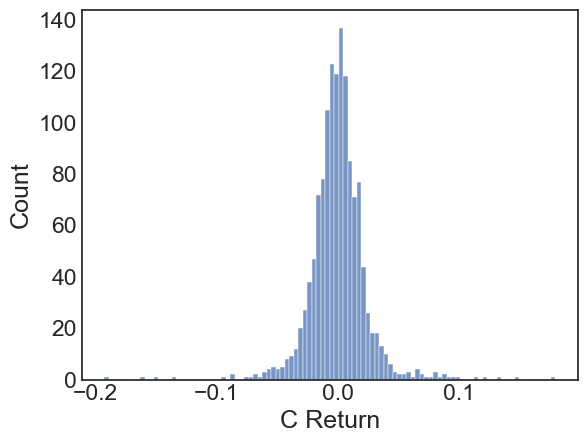

In [168]:
sns.histplot(dfReturns['C Return'], bins=100)

Let's examine the correlation between individual stocks. It is obvious that within the same sector, stocks must be correlated, but is it evenly so?

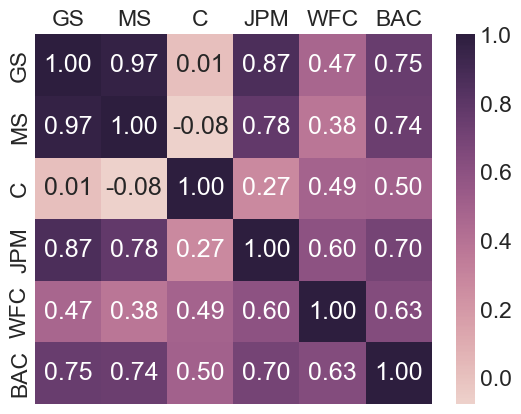

In [169]:
ht = sns.heatmap(dfClose.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))
ht.set(xlabel="", ylabel="")
ht.xaxis.tick_top()

Graphically, it doesn't look the best. A good idea would be to use hierarchical clustering. It clearly shows which assets have the highest correlation. Due to the high positive correlation, the stocks in question should have their target weights in the portfolio reduced.

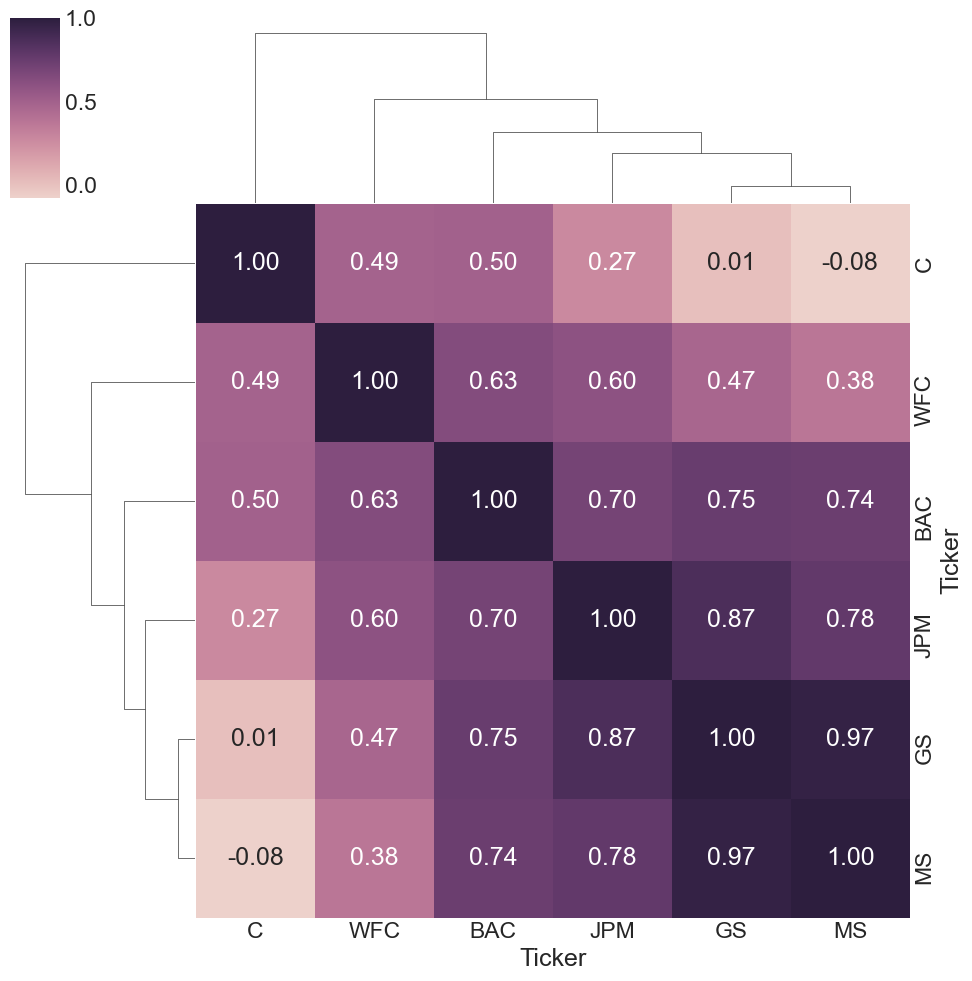

In [170]:
cm = sns.clustermap(dfClose.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))

# Volatility
Volatility 
$$volatility = \sigma_{\text{minPeriods}} \times \sqrt{minPeriods}$$

is an indicator of market risk. The higher it is, the riskier it is to stay in the market.
We can clearly observe a radical jump in volatility during the 2020 pandemic.

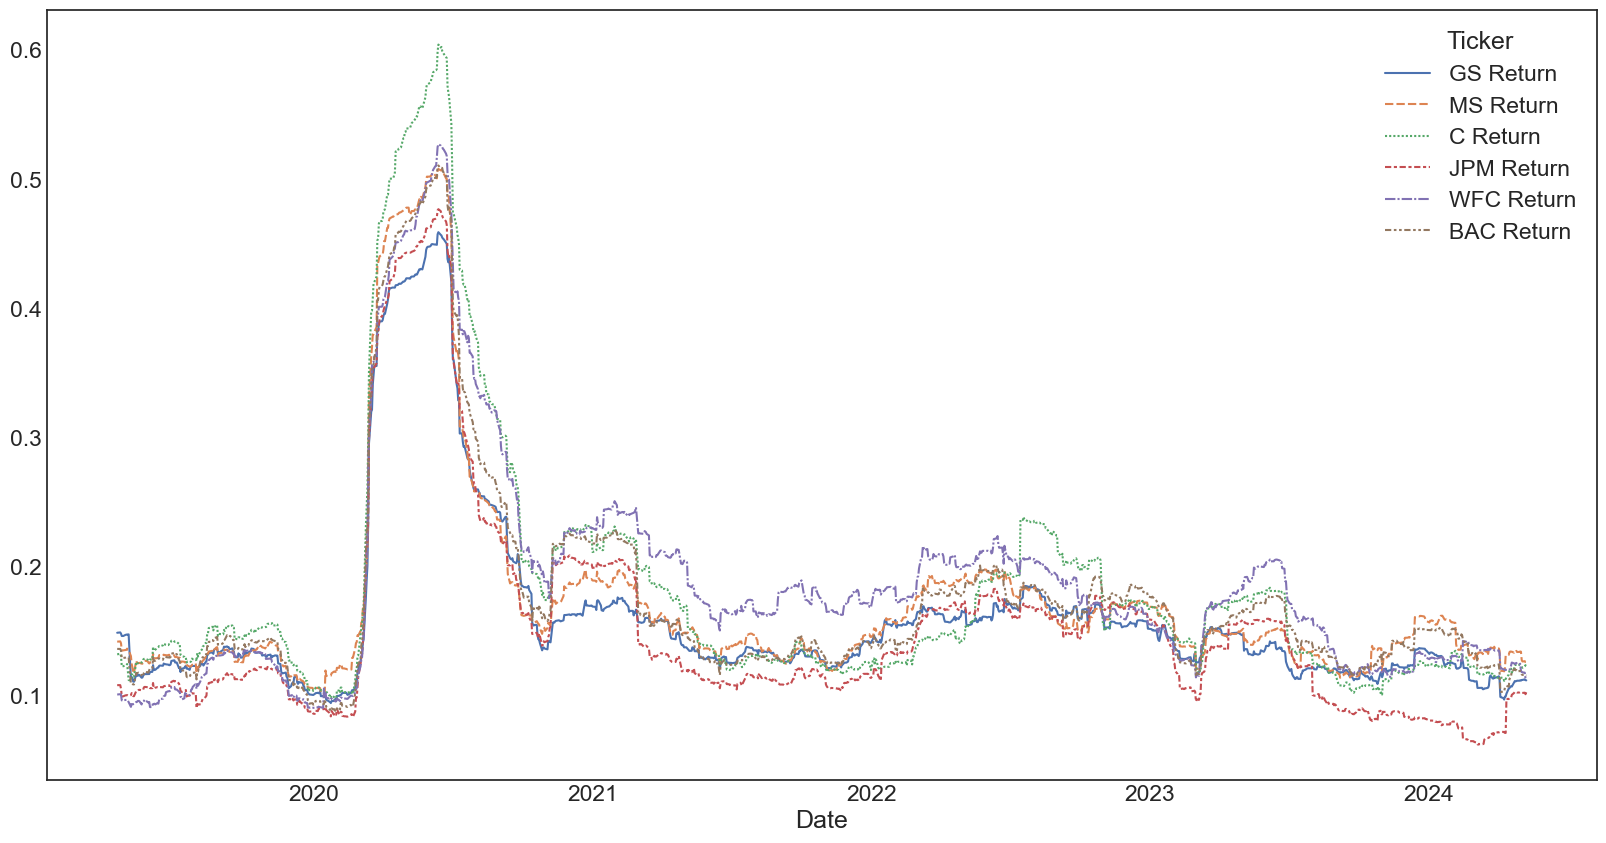

In [171]:
minPeriods = 75

vol = dfReturns.rolling(minPeriods).std() * np.sqrt(minPeriods)

plt.figure(figsize=(20,10))
sns.lineplot(vol)
sns.set(font_scale=1.5)

plt.show()

# Simple moving average analysis

Let's check how the theory of signals generated by two moving averages with different and arbitrarily chosen steps behaves in practice.

First, we need to establish the time steps for the moving averages - the shorter and the longer one - that is, from how many days the moving average will be calculated.

The most popular lengths in long-term trading are 50 and 200.

In [172]:
shortWindow = 50
shortWindowLabel = 'SMA{}'.format(shortWindow)
longWindow = 200
longWindowLabel = 'SMA{}'.format(longWindow)

## Buy/Sell signals - points where short SMA crosses long from bottom-up or up-bottom

In the practical application of two moving averages, we are interested in the signals generated by the crossing of the averages. When the average with the shorter step becomes larger than the longer one, we have a buy signal - the market's cumulative demand is greater than the long-term trend. The opposite situation occurs when the shorter average becomes smaller than the longer one - we receive a sell signal.

Buy = 1, Sell = -1, Hold = 0

In [173]:
dfCloseSMA = dfClose.copy()
dfCloseSMA['Date'] = dfCloseSMA.index

dfCloseSMA['JPMsignalMark'] = 0

dfCloseSMA['smaShort'] = dfCloseSMA['JPM'].rolling(window=shortWindow, min_periods=1).mean()
dfCloseSMA['smaLong'] = dfCloseSMA['JPM'].rolling(window=longWindow, min_periods=1).mean()

# NumPy.where(): if True return 1 or -1; if False return 0
# Find the periods in which the short average is greater than the long one.

dfCloseSMA['JPMsignalMark'] = np.where(dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 1, 0)

# NumPy.diff(): the first difference is given by out[i] = a[i+1] - a[i] along the given axis
# Find a trading signal

dfCloseSMA['JPMsignalMark'] = dfCloseSMA['JPMsignalMark'].diff()


Mark Buy/Sell has been established for variable -1/1 (SMAs crossover point), but it's linked to the actual price, highlighting that this technique generates a delay not only in time but also in price.

First iteration of simple moving analysis technique.

In [174]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [175]:
plt.style.use('seaborn-v0_8-white')

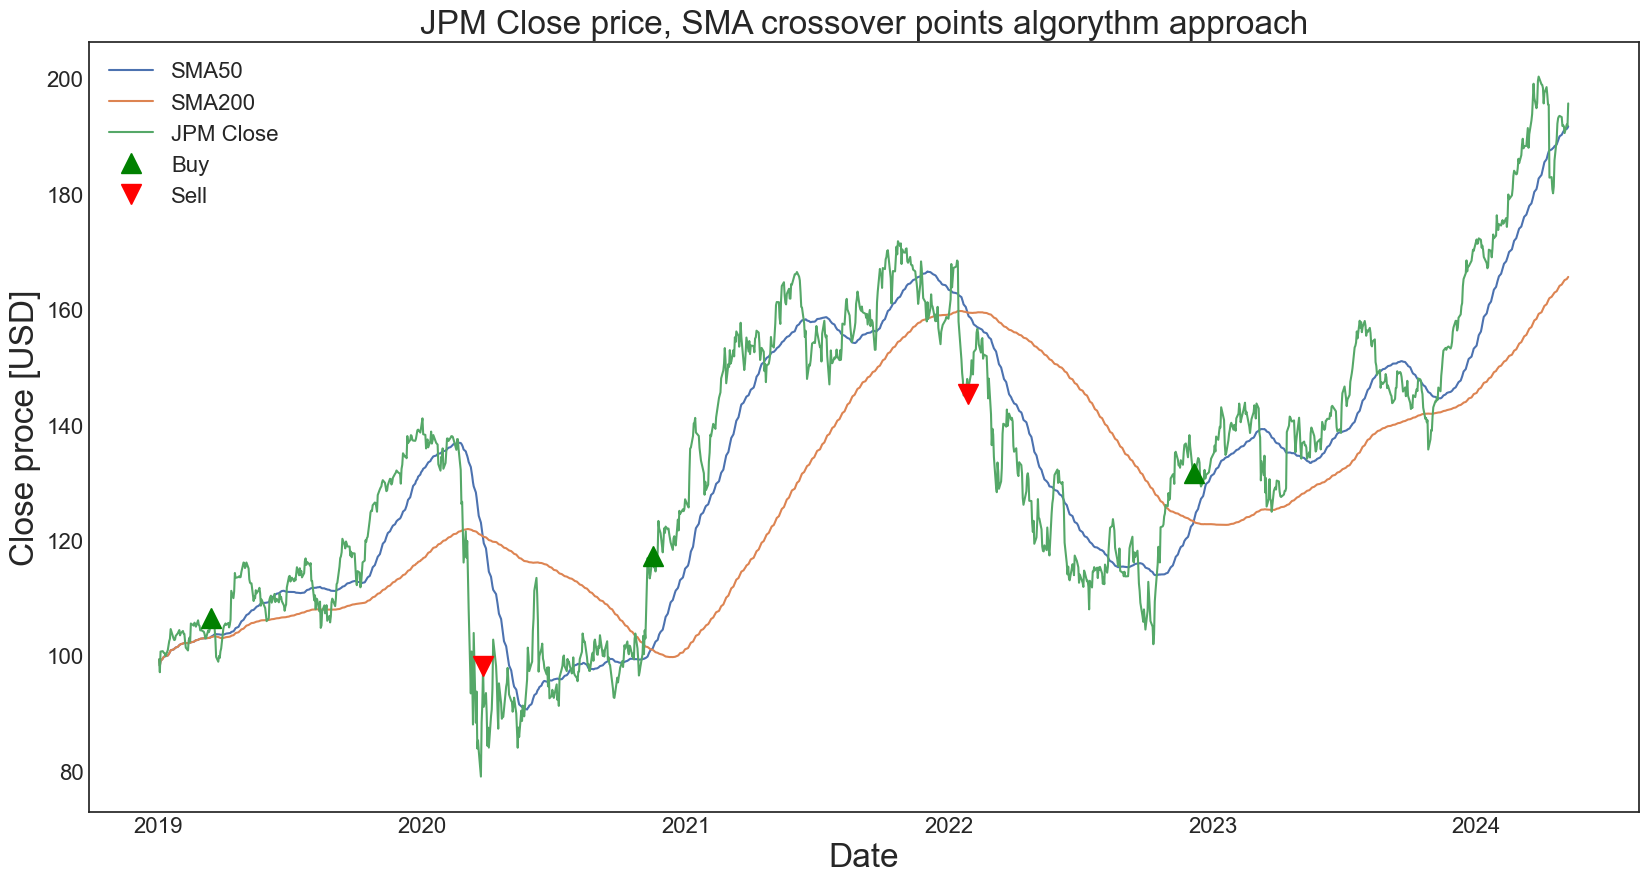

Ticker,GS,MS,C,JPM,WFC,BAC,Date,JPMsignalMark,smaShort,smaLong
Date,,,,,,,,,,
2019-03-15,198.259995,43.330002,65.190002,106.550003,50.660000,29.299999,2019-03-15,1.0,103.269200,103.191569
2020-03-26,165.789993,35.709999,46.020000,98.120003,30.900000,22.719999,2020-03-26,-1.0,120.359200,120.644200
2020-11-16,222.380005,58.110001,50.400002,117.300003,24.900000,27.580000,2020-11-16,1.0,101.206000,101.005950
2022-01-27,341.029999,101.150002,64.150002,145.309998,53.759998,45.470001,2022-01-27,-1.0,159.156801,159.419850
2022-12-06,362.910004,87.510002,44.980000,131.589996,43.400002,33.000000,2022-12-06,1.0,123.259999,123.222800


In [176]:
plt.figure(figsize=(20,10))

plt.plot(dfCloseSMA.index, dfCloseSMA['smaShort'],label=shortWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['smaLong'],label=longWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['JPM'],label='JPM Close')

plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

plt.title('JPM Close price, SMA crossover points algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close proce [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='upper left', fontsize='16')
plt.show()

(dfCloseSMA.loc[(dfCloseSMA['JPMsignalMark'] == 1) | (dfCloseSMA['JPMsignalMark'] == -1)])


## Counting total return from hypothetical investment

In [177]:
initialCapital = 10000 # USD

dfCloseSMA['DailyReturns'] = dfCloseSMA['JPM'].pct_change()
dfCloseSMA['OnMarket'] = 0
dfCloseSMA.loc[dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 'OnMarket'] = 1

dfCloseSMA['OnMarketReturns'] = dfCloseSMA['DailyReturns'] * dfCloseSMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseSMA['CumulativeProfit'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseSMA['StrategyCumulative'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * dfCloseSMA['JPM'].iloc[0]

dfCloseSMA.fillna(0, inplace=True)
dfCloseSMA.head()


Ticker,GS,MS,C,JPM,WFC,BAC,Date,JPMsignalMark,smaShort,smaLong,DailyReturns,OnMarket,OnMarketReturns,CumulativeProfit,StrategyCumulative
Date,,,,,,,,,,,,,,,
2019-01-02,172.029999,40.400002,53.529999,99.309998,46.939999,24.959999,2019-01-02,0.0,99.309998,99.309998,0.000000,0,0.0,0.0,0.000000
2019-01-03,169.509995,39.680000,52.560001,97.110001,46.570000,24.559999,2019-01-03,0.0,98.209999,98.209999,-0.022153,0,-0.0,10000.0,99.309998
2019-01-04,175.050003,41.299999,55.130001,100.690002,47.950001,25.580000,2019-01-04,0.0,99.036667,99.036667,0.036865,0,0.0,10000.0,99.309998
2019-01-07,176.020004,41.709999,55.610001,100.760002,47.639999,25.559999,2019-01-07,0.0,99.467501,99.467501,0.000695,0,0.0,10000.0,99.309998
2019-01-08,175.369995,41.450001,55.459999,100.570000,47.540001,25.510000,2019-01-08,0.0,99.688000,99.688000,-0.001886,0,-0.0,10000.0,99.309998


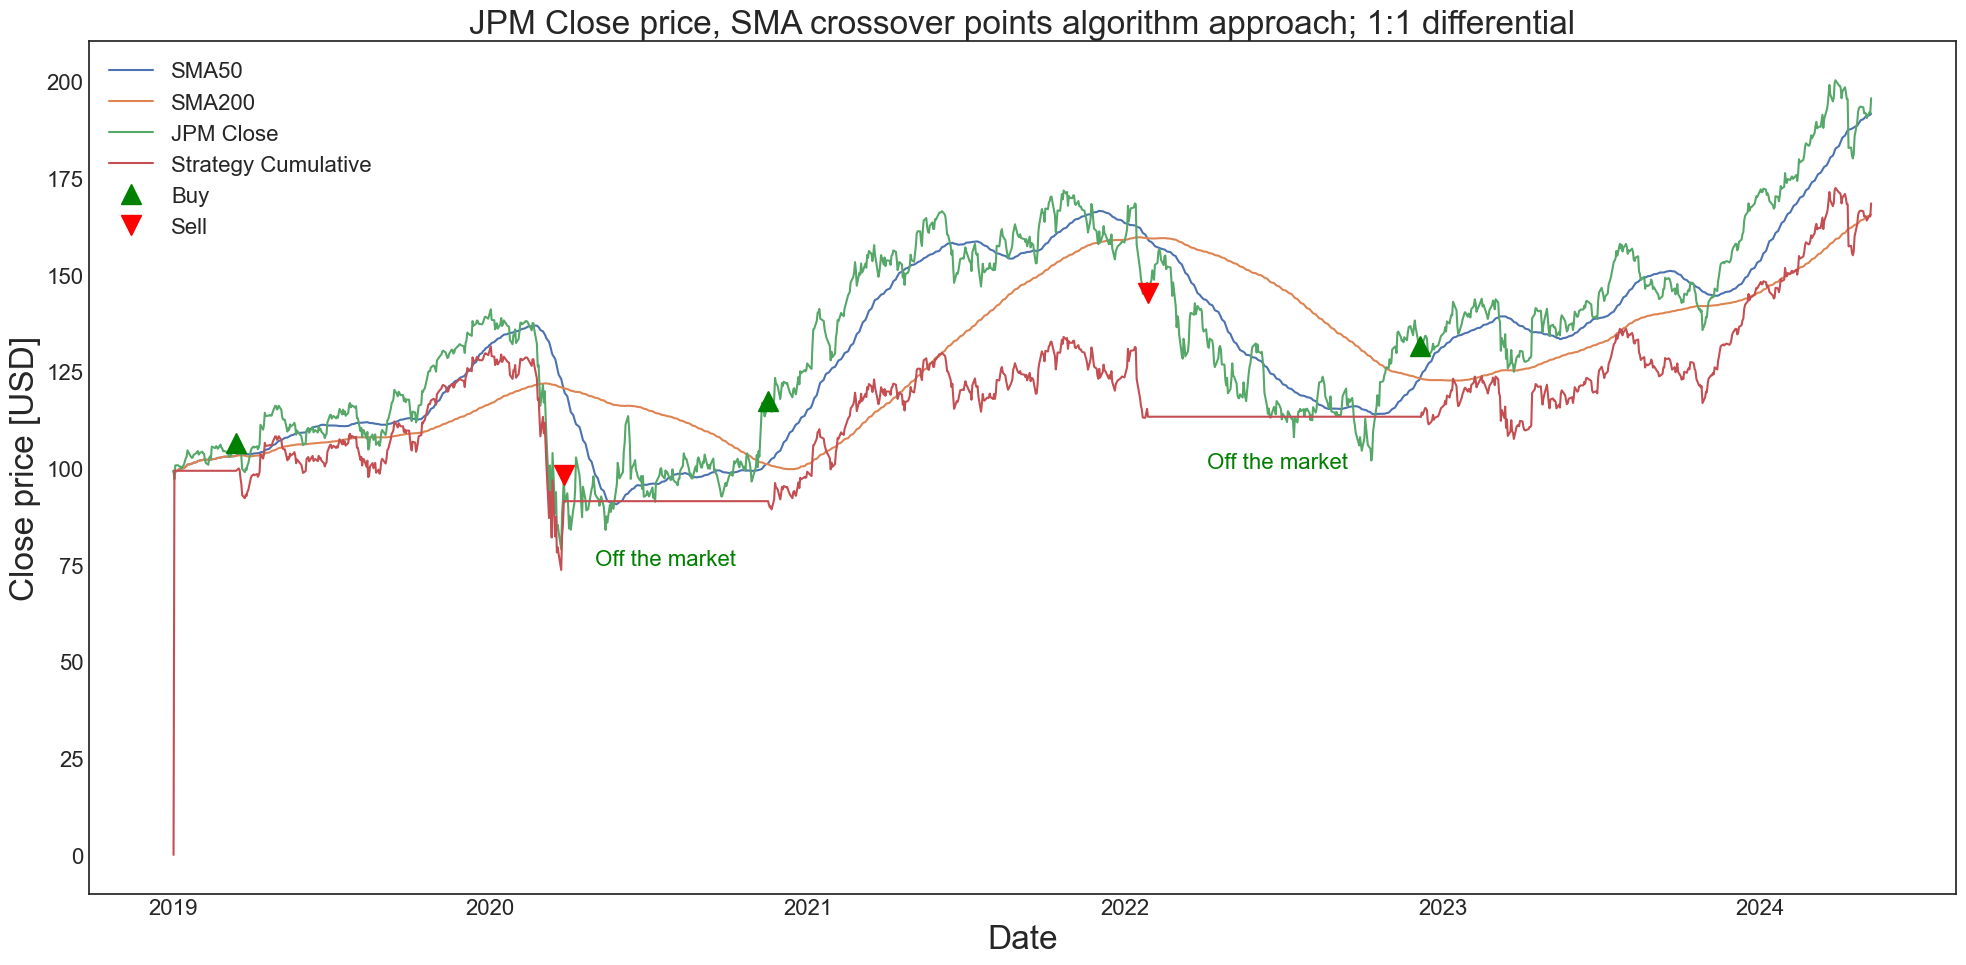

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')
ax1.plot(dfCloseSMA.index, dfCloseSMA['StrategyCumulative'], label='Strategy Cumulative')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')

ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 75), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 75),
    fontsize=16, color='green'
)
ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2022-04-05'], 100), 
    xytext=(dfCloseSMA['Date'].loc['2022-04-05'], 100),
    fontsize=16, color='green'
)
plt.title('JPM Close price, SMA crossover points algorithm approach; 1:1 differential', fontsize=24)
plt.tight_layout()
plt.show()

buy_and_hold_pct = (dfCloseSMA['JPM'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseSMA['StrategyCumulative'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100

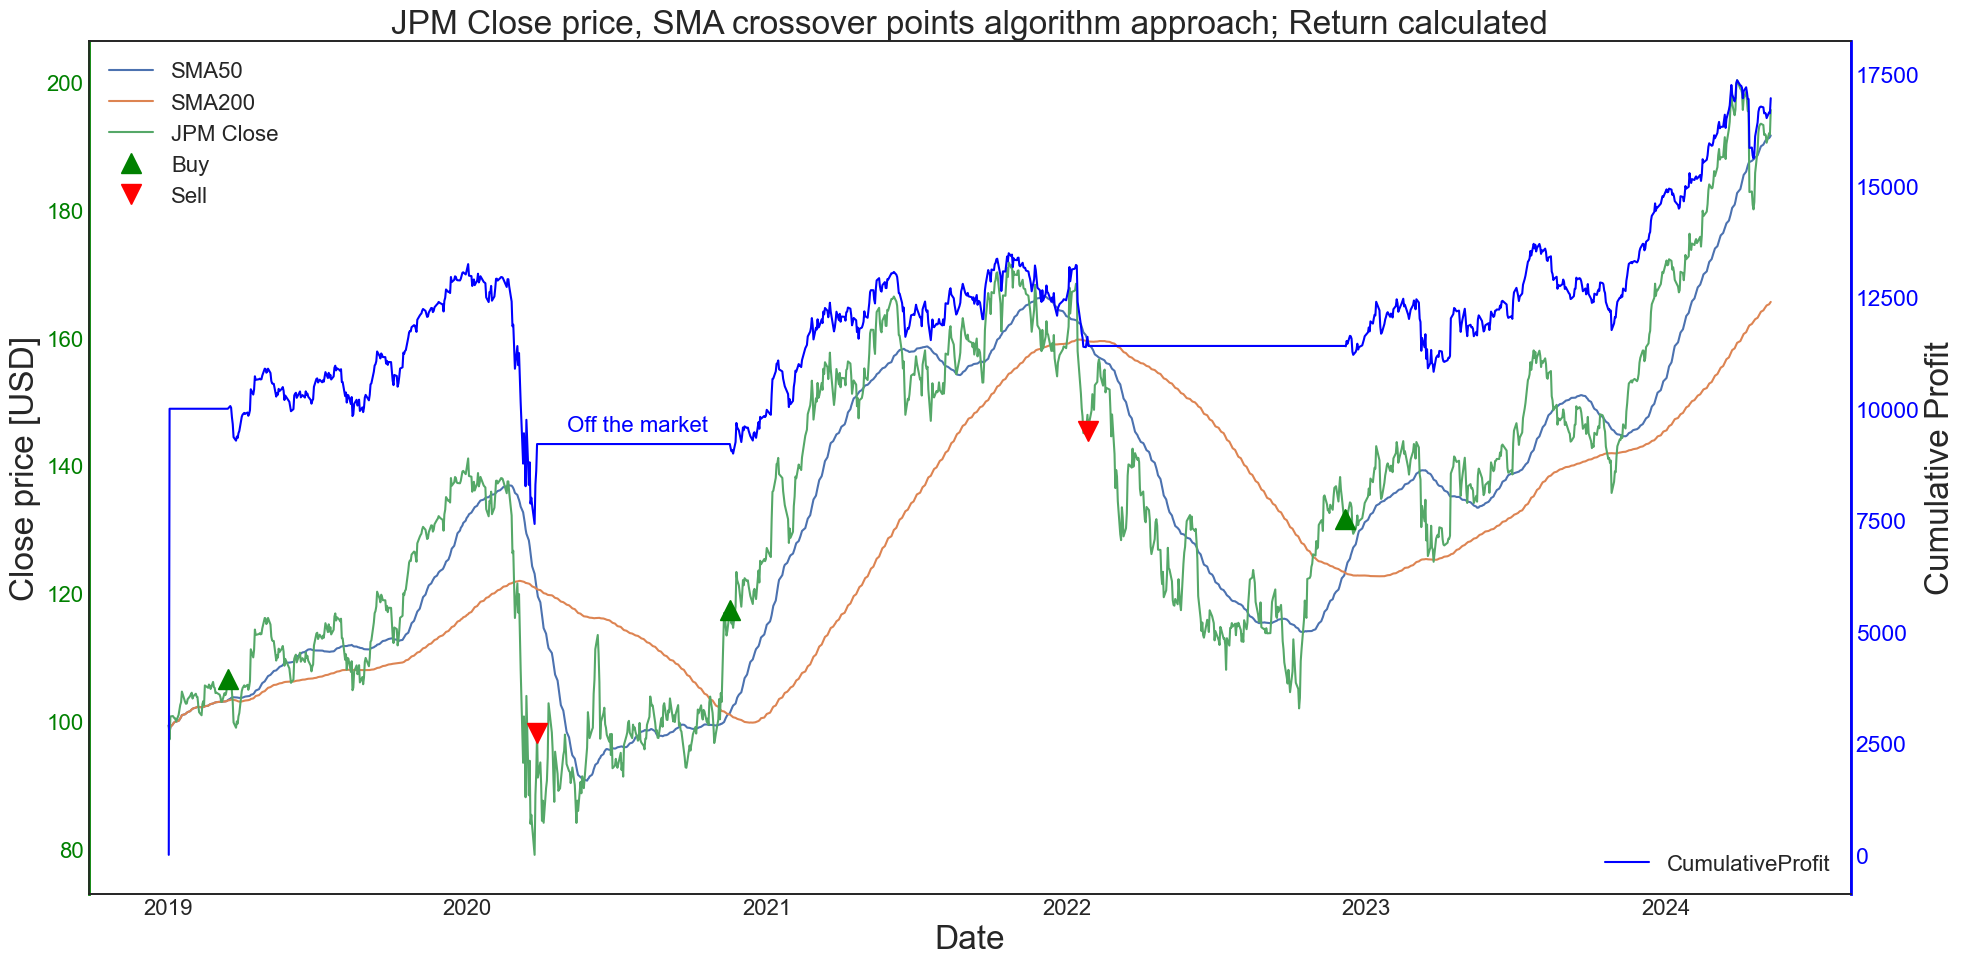

- Strategy pct. return 169.61% vs Buy and hold pct. return 197.01%

- Initial capital was 10000 USD, and cumulative profit amounted to 6961.28 USD; 
which gives a total amount equal to 16961.28 USD


In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')
# ax1.plot(dfCloseSMA.index, dfCloseSMA['StrategyCumulative'])

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')
ax1.spines['left'].set_color('green')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='y', colors='green', width=2)

ax2 = ax1.twinx()
ax2.plot(dfCloseSMA.index, dfCloseSMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
ax2.set_ylabel('Cumulative Profit', fontsize=24)
ax2.legend(loc='lower right', fontsize='16')
ax2.spines['right'].set_color('blue')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y', colors='blue', width=2)

ax2.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 9500), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 9500),
    fontsize=16, color='blue'
)

plt.title('JPM Close price, SMA crossover points algorithm approach; Return calculated', fontsize=24)
plt.tight_layout()
plt.show()

buy_and_hold_pct = (dfCloseSMA['JPM'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseSMA['StrategyCumulative'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100

print(f"- Strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to {round(dfCloseSMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal to {round(dfCloseSMA['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential moving average

The Exponential Moving Average (EMA) is a type of weighted moving average (WMA) that places a greater weight and significance on the most recent data points. It is commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.

**Application**

EMA is particularly popular in stock market analysis, where it helps traders and analysts track the momentum and potentially identify trends in stock prices. It's also used in economics for forecasting future trends based on historical data.

**Formula**

The formula for the Exponential Moving Average is given by:

$$
EMA_{today} = (\text{Value}_{today} \times K) + (EMA_{yesterday} \times (1 - K))
$$

where:
- $\text{Value}_{today}$ is the price or value at the current time period.
- $EMA_{yesterday}$ is the EMA from the previous period.
- $K$ is the smoothing constant, calculated as $\frac{2}{{N + 1}}$, where $N$ is the number of periods in the EMA.

This formula helps in reducing the lag by applying more weight to recent data, making the EMA quicker to react to price changes compared to the Simple Moving Average (SMA).


In [214]:
dfCloseEMA = dfClose.copy()
dfCloseEMA['JPMsignalMark'] = 0
dfCloseEMA['emaLong'] = dfClose['JPM'].ewm(span=200, adjust=False).mean()

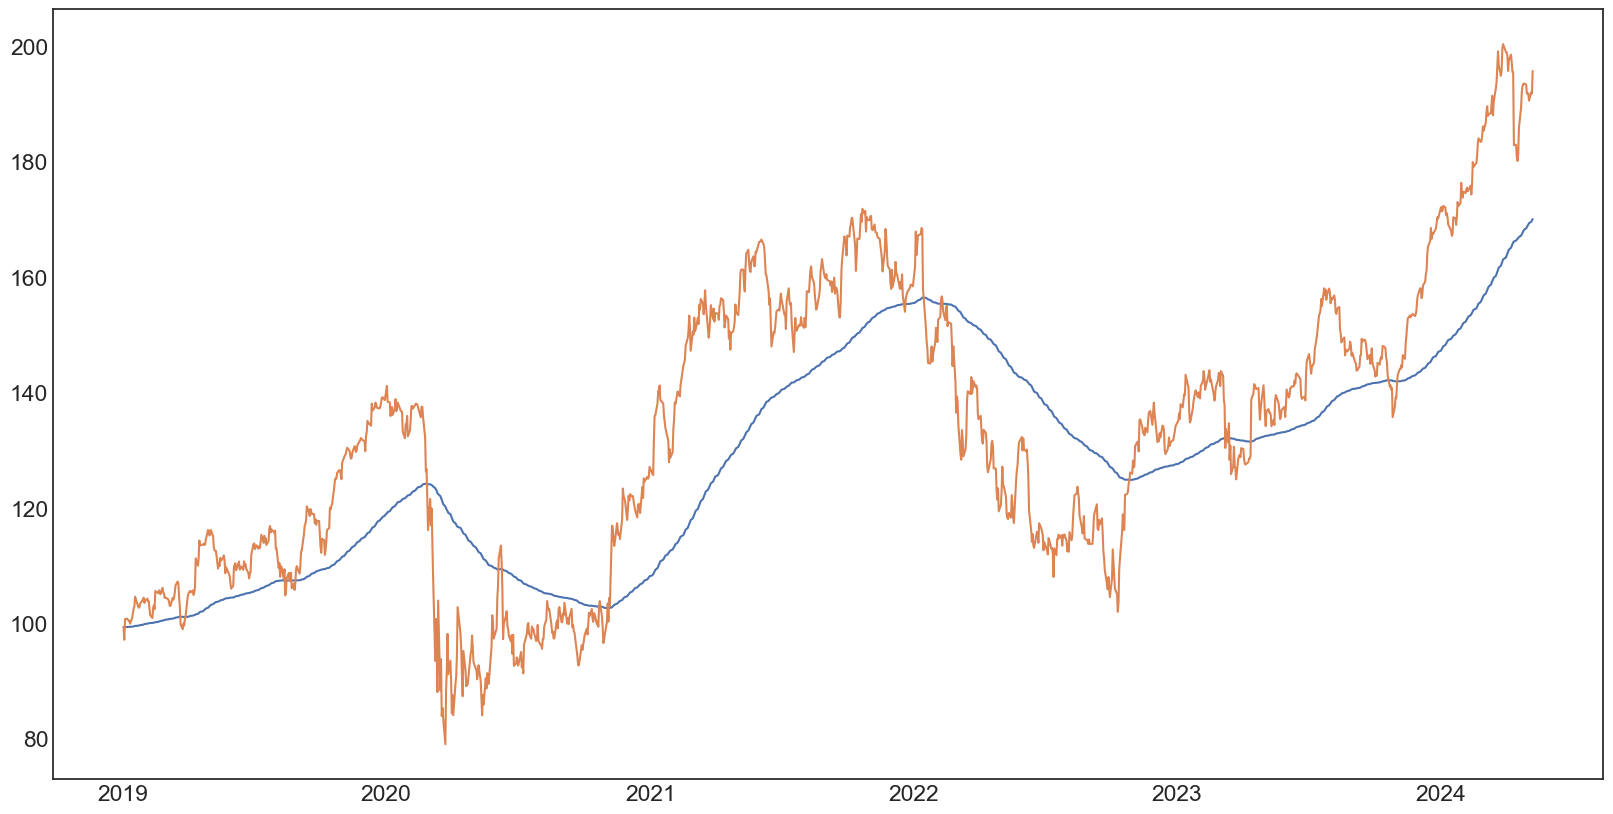

In [215]:
plt.figure(figsize=(20,10))
plt.plot(dfCloseEMA.index, dfCloseEMA['emaLong'],label='EMA')
plt.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')